##In this file we are using the casia_b dataset running on inception_v2 model for to check how much accuracte the model in this model

Mounting the drive to get the slipted data

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzipping the folder 

In [25]:
!unzip -q "/content/drive/MyDrive/Data Folder1.zip"

replace Data Folder/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Importing the library for the loading and model building

In [26]:
import os
import math
import tensorflow as tf
import glob
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models,layers,optimizers,datasets
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing import image 
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)


Generating the images for to boosting the accuracy for the CAISA_B dataset

In [27]:
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(validation_split=0.2, preprocessing_function=preprocess_input)
train_flow = train_gen.flow_from_directory("/content/Data Folder/train/", target_size=(256, 256), batch_size=130, subset="training")
valid_flow = train_gen.flow_from_directory("/content/Data Folder/val/", target_size=(256, 256), batch_size=130, subset="validation")

Found 28891 images belonging to 3 classes.
Found 3095 images belonging to 3 classes.


Importing the pretrain model inceptionresnetV2 and using the input shape as (256,256,3)

Also we are using the Globalaveragemaxpooling and batchnormalization for the layer building for accurate the result.


Using RMSPROP as optimizer with categorial crossentropy with learning rate=1e-4 

In [28]:

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2 
from keras.models import Model, Sequential

res = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3)) 

for layer in res.layers: 
  layer.trainable = False

x = res.output 
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x)

model = Model(res.input, x) 
opt = tf.keras.optimizers.RMSprop(
    learning_rate=1e-4 ,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 

model.summary() 

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_812 (Conv2D)            (None, 127, 127, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_818 (Batch  (None, 127, 127, 32  96         ['conv2d_812[0][0]']             
 Normalization)                 )                                                           

Fitting the model for the train and tet flow of the data that we slipted in pretraining of the model

In [29]:
history = model.fit_generator(train_flow, epochs=10, validation_data=valid_flow)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
223/223 [==============================] - 125s 501ms/step - loss: 1.6566 - accuracy: 0.3746 - val_loss: 1.9915 - val_accuracy: 0.2149
Epoch 2/10
223/223 [==============================] - 107s 479ms/step - loss: 1.3913 - accuracy: 0.4453 - val_loss: 1.0237 - val_accuracy: 0.5257
Epoch 3/10
223/223 [==============================] - 107s 479ms/step - loss: 1.2889 - accuracy: 0.4885 - val_loss: 0.9682 - val_accuracy: 0.5916
Epoch 4/10
223/223 [==============================] - 107s 478ms/step - loss: 1.2139 - accuracy: 0.5190 - val_loss: 0.9644 - val_accuracy: 0.5945
Epoch 5/10
223/223 [==============================] - 107s 478ms/step - loss: 1.1734 - accuracy: 0.5298 - val_loss: 0.9576 - val_accuracy: 0.5974
Epoch 6/10
223/223 [==============================] - 107s 479ms/step - loss: 1.1254 - accuracy: 0.5426 - val_loss: 0.9602 - val_accuracy: 0.6039
Epoch 7/10
223/223 [==============================] - 107s 479ms/step - loss: 1.0997 - accuracy: 0.5499 - val_loss: 0.9426 -

Ploting the graph of the accuracy 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


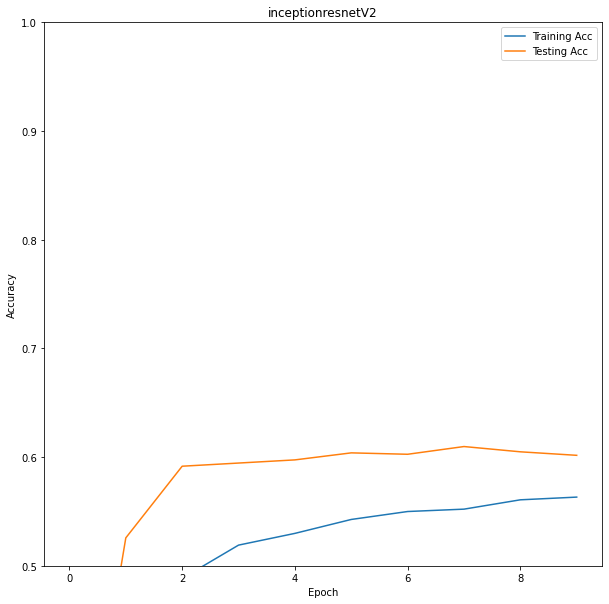

In [30]:
plt.figure(figsize=(10,10))
plt.title("InceptionresnetV2")
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'],label='Testing Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower_right')


In [32]:
plt.savefig('inceptionv2.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>